In [ ]:
#Import scikit-learn dataset library
from sklearn import datasets
import numpy as np

#Load dataset
iris = datasets.load_iris()

X = np.array([[1000000000, 100000000000, 1000000000, "blob"], [1000000000, 100000000000, 1000000000, 1000000000], [1000000000, 100000000000, 1000000000, 1000000000], [1000000000, 100000000000, 1000000000, 1000000000], [1000000000, 100000000000, 1000000000, 1000000000], [1000000000, 100000000000, 1000000000, 1000000000], [1000000000, 100000000000, 1000000000, 1000000000], [1000000000, 100000000000, 1000000000, 1000000000], [1000000000, 100000000000, 1000000000, 1000000000], [1000000000, 100000000000, 1000000000, 1000000000], [1000000000, 100000000000, 1000000000, 1000000000], [1000000000, 100000000000, 1000000000, 1000000000]])
Y = [10000000000000, 10000000000000, 10000000000000, 10000000000000, 10000000000000, 10000000000000, 10000000000000, 10000000000000, 10000000000000, 10000000000000, 10000000000000, 10000000000000, 10000000000000]

iris['data'] = np.vstack([iris['data'], X])
iris['target'] = np.hstack([iris['target'], Y])

print(iris)

{'data': array([['5.1', '3.5', '1.4', '0.2'],
       ['4.9', '3.0', '1.4', '0.2'],
       ['4.7', '3.2', '1.3', '0.2'],
       ['4.6', '3.1', '1.5', '0.2'],
       ['5.0', '3.6', '1.4', '0.2'],
       ['5.4', '3.9', '1.7', '0.4'],
       ['4.6', '3.4', '1.4', '0.3'],
       ['5.0', '3.4', '1.5', '0.2'],
       ['4.4', '2.9', '1.4', '0.2'],
       ['4.9', '3.1', '1.5', '0.1'],
       ['5.4', '3.7', '1.5', '0.2'],
       ['4.8', '3.4', '1.6', '0.2'],
       ['4.8', '3.0', '1.4', '0.1'],
       ['4.3', '3.0', '1.1', '0.1'],
       ['5.8', '4.0', '1.2', '0.2'],
       ['5.7', '4.4', '1.5', '0.4'],
       ['5.4', '3.9', '1.3', '0.4'],
       ['5.1', '3.5', '1.4', '0.3'],
       ['5.7', '3.8', '1.7', '0.3'],
       ['5.1', '3.8', '1.5', '0.3'],
       ['5.4', '3.4', '1.7', '0.2'],
       ['5.1', '3.7', '1.5', '0.4'],
       ['4.6', '3.6', '1.0', '0.2'],
       ['5.1', '3.3', '1.7', '0.5'],
       ['4.8', '3.4', '1.9', '0.2'],
       ['5.0', '3.0', '1.6', '0.2'],
       ['5.0', '3.4', '1.6', 

In [ ]:
import typing as t

class Filter:
    """Base class for all the implemented class noise filters.
    Attributes
    ----------
    rem_indx : :obj:`List`
        Removed indexes (rows) from the dataset after the filtering.
    parameters : :obj:`Dict`
        Parameters used to define the behaviour of the filter.
    clean_data : :obj:`Sequence`
        Filtered independent attributes(X) of the dataset.
    clean_classes : :obj:`Sequence`
        Filtered target attributes(y) of the dataset.
    """

    def __init__(self, parameters: t.Dict):
        """
        Parameters
        ----------
        parameters : :obj:`Dict`
            Dictionary that provides hyperparameters for filters algorithms.
        """
        # Removed Indexes
        self.rem_indx: t.List = []
        self.parameters = parameters

    def set_cleanData(self, attributes: t.Sequence, labels: t.Sequence) -> t.NoReturn:
        """Helper function to set data and classes to Filter instance.
        Parameters
        ----------
        data : :obj:`Sequence`
            Filtered independent attributes(X) of the dataset.
        classes : :obj:`Sequence`
            Filtered target attributes(y) of the dataset.
        """
        self.clean_data = attributes
        self.clean_classes = labels

In [ ]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

class CNN:
    def __init__(self, max_neighbours: int = 5, n_jobs: int = -1):
        self.max_neighbours = max_neighbours
        self.filter = Filter(parameters = {})
        self.n_jobs = n_jobs
        self.clf = KNeighborsClassifier(n_neighbors = 1, n_jobs = self.n_jobs)

    def __call__(self, data: t.Sequence, classes: t.Sequence):
        self.isNoise = np.array([False] * len(classes))

        firstDifIndx = next(indx for indx, num in enumerate(classes) if num != classes[0])
        inStore = [0, firstDifIndx]
        grabBag = [indx for indx in range(1, firstDifIndx)]
        for indx in range(firstDifIndx + 1, len(classes)):
            self.clf.fit(data[inStore], classes[inStore])
            pred = self.clf.predict(data[indx].reshape(1, -1))
            if pred == classes[indx]:
                grabBag.append(indx)
            else:
                inStore.append(indx)
        keepOn = True
        while(keepOn):
            keepOn = False
            for indx in grabBag:
                self.clf.fit(data[inStore], classes[inStore])
                pred = self.clf.predict(data[indx].reshape(1, -1))
                if (pred != classes[indx]):
                    inStore.append(indx)
                    grabBag.remove(indx)
                    keepOn = True
        self.filter.rem_indx = grabBag
        self.filter.rem_indx.sort()
        notNoise = inStore
        notNoise.sort()
        self.filter.set_cleanData(data[notNoise], classes[notNoise])
    print(filter)

cnn=CNN(iris.data, iris.target)
print("clf", cnn.clf)
print("filter", cnn.filter)
print("max", cnn.max_neighbours)
print("n", cnn.n_jobs)

<class 'filter'>
clf KNeighborsClassifier(n_jobs=array([             0,              0,              0,              0,
                    0,              0,              0,              0,
                    0,              0,              0,              0,
                    0,              0,              0,              0,
                    0,              0,              0,              0,
                    0,              0,              0,              0,
                    0,              0,              0,              0,
                    0,              0,              0,              0,
                    0,              0,              0,              0,
                    0,              0,              0,              0,
                    0,              0,              0,              0,
                    0,              0,              0,              0,
                    0,              0,              1,              1,
                    1,      

In [ ]:
# Creating a DataFrame of given iris dataset.
import pandas as pd
data=pd.DataFrame({
    'sepal length':cnn.max_neighbours[:,0],
    'sepal width':cnn.max_neighbours[:,1],
    'petal length':cnn.max_neighbours[:,2],
    'petal width':cnn.max_neighbours[:,3],
    'species':cnn.n_jobs
})
data.head()

print(data)

ValueError: ignored

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

Accuracy: 0.9555555555555556


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


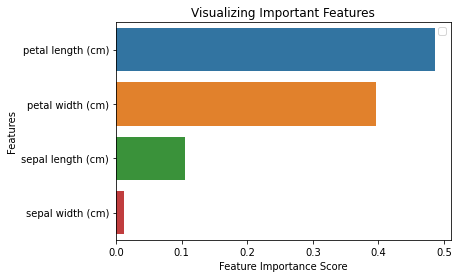

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

species_idx = clf.predict([[3, 5, 4, 2]])[0]
iris.target_names[species_idx]

import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()